# 12 • Análisis exploratorio de datos (EDA)
El EDA es una herramienta de análisis para una revisión iterativa de las bases de datos con la cual describimos las principales características usando estadística descriptiva y visualización de datos.

## Contenido
1. Fuentes de datos
2. Descripción de los datos
3. Limpieza de datos
4. Missing values
5. Visualización de datos
6. EDA un proceso iterativo
7. Referencias

## 1. Fuentes de datos
Existen distintas fuentes de información que podemos utilizar para nuestros proyectos, en función de la problemática que intentemos resolver.

### Datos estructurados y no estructurados
Las fuentes de información las podemos encontrar en distintos formatos como base de datos estructuradas y no estructuradas.

Las bases de __datos estructurados__ es información que suele estar presentada en forma de tablas, clasificadas y algunas veces relacionadas. Estas bases de datos son guardadas en Excel o SQL. Algunos formatos son `xls`, `csv`, `json`, entre otros.

Por otro lado, los __datos no estructurados__ contienen una colección de datos sin una estructura específica y pueden estar en distintos formatos como texto, audio, imagen o video, es decir, archivos con terminación `doc`, `pdf`, `mp3`, `mp4`, etc. 

### Privadas y públicas
Las fuentes de datos pueden provenir de información __privada__ que manejan las empresas en sus bases de datos internas, las cuales pueden contener datos personales. En caso de utilizar estas bases de datos, se recomienda darle un tratamiento para no compartir información personal sensible de trabajadores, clientes, empresas, etc.

Las fuentes de datos __públicas__ son publicadas por instituciones públicas, empresas, fundaciones u organizaciones. Alguna de esta información proviene de fuentes oficiales como entidades gubernamentales, bancos centrales, organizaciones internacionales. A continuación comparto algunos lugares donde se puede encontrar fuentes de información pública:

#### México
- [INEGI](https://www.inegi.org.mx/datosabiertos/)
- [Gobierno de México](https://datos.gob.mx/busca/dataset)
- [Banco de México](https://www.banxico.org.mx/SieInternet/)
- [IMSS](http://datos.imss.gob.mx)


#### Mundiales
- [United Nations](https://data.un.org)
- [U.S. Government’s open data](https://data.gov)
- [The World Bank](https://data.worldbank.org)
- [OECD.org](https://stats.oecd.org)
- [World Health Organization](https://www.who.int/data/gho)
- [Common Data Set Initiative](https://commondataset.org)
- [International Monetary Fund](https://www.imf.org/en/Data)
- [Human Development Index](https://hdr.undp.org/data-center)
- [European Commission Eurostat](https://ec.europa.eu/eurostat/data/database)
- [India Human Development Survey](https://ihds.umd.edu/data)
- [Open Data Pakistan](https://opendata.com.pk/dataset)

#### Otras fuentes
- [Kaggle datasets](https://www.kaggle.com/datasets)
- [Hugging Face](https://huggingface.co/datasets)
- [FiveThirtyEight](https://data.fivethirtyeight.com)
- [Awesome Public Datasets en GitHub](https://github.com/awesomedata/awesome-public-datasets)
- [University of Cambridge](https://www.data.cam.ac.uk/repository#University%20repository)

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from datetime import datetime
import re

In [2]:
## To install Altair look the following link
##    https://altair-viz.github.io/getting_started/installation.html
# !pip install altair vega_datasets #<--Instalar desde `pip`
# !conda install -c conda-forge altair vega_datasets #<--Instalar desde `conda`

import altair as alt
# alt.renderers.enable('default')
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

Para este ejercicio utilizaremos la siguiente base de datos: [Pakistan Food Prices](https://opendata.com.pk/dataset/pakistan-food-prices).

Esta base de datos contiene información de precios de comida en Pakistan, a partir de 2004, provenientes del "World Food Programme" y contiene precios de productos como maíz, arroz, frijoles, pescado, azúcar. 

In [3]:
# Load dataset
file = "https://opendata.com.pk/dataset/ec1f8db6-4f93-4d11-b062-c38ac2a5d603/resource/9b42d48c-b689-44ca-a1df-8cf919c5e1d4/download/wfp_food_prices_pakistan.csv"
df_0 = pd.read_csv(file)

## 2. Descripción de los datos

In [4]:
# Save the description of variables
description = df_0.iloc[0].to_dict()
description

{'date': '#date',
 'cmname': '#item+name',
 'unit': '#item+unit',
 'category': '#item+type',
 'price': '#value',
 'currency': '#currency',
 'country': '#country+name',
 'admname': '#adm1+name',
 'adm1id': '#adm1+code',
 'mktname': '#name+market',
 'mktid': nan,
 'cmid': '#item+code',
 'ptid': nan,
 'umid': nan,
 'catid': '#item+type+code',
 'sn': '#meta+id',
 'default': nan}

In [5]:
# Head of database (& drop description's row)
df = df_0.drop([0])
df.head()

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn,default
1,2004-01-15,Wheat flour - Retail,KG,cereals and tubers,13.0,PKR,Pakistan,Balochistan,2272,Quetta,295.0,58,15.0,5.0,1,295_58_15_5,NaN
2,2004-02-15,Wheat flour - Retail,KG,cereals and tubers,13.0,PKR,Pakistan,Balochistan,2272,Quetta,295.0,58,15.0,5.0,1,295_58_15_5,NaN
3,2004-03-15,Wheat flour - Retail,KG,cereals and tubers,14.25,PKR,Pakistan,Balochistan,2272,Quetta,295.0,58,15.0,5.0,1,295_58_15_5,NaN
4,2004-04-15,Wheat flour - Retail,KG,cereals and tubers,12.5,PKR,Pakistan,Balochistan,2272,Quetta,295.0,58,15.0,5.0,1,295_58_15_5,NaN
5,2004-05-15,Wheat flour - Retail,KG,cereals and tubers,13.25,PKR,Pakistan,Balochistan,2272,Quetta,295.0,58,15.0,5.0,1,295_58_15_5,NaN


In [6]:
# Variables
df.columns

Index(['date', 'cmname', 'unit', 'category', 'price', 'currency', 'country',
       'admname', 'adm1id', 'mktname', 'mktid', 'cmid', 'ptid', 'umid',
       'catid', 'sn', 'default'],
      dtype='object')

In [7]:
# Información general
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7662 entries, 1 to 7662
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      7662 non-null   object 
 1   cmname    7662 non-null   object 
 2   unit      7662 non-null   object 
 3   category  7662 non-null   object 
 4   price     7662 non-null   object 
 5   currency  7662 non-null   object 
 6   country   7662 non-null   object 
 7   admname   7662 non-null   object 
 8   adm1id    7662 non-null   object 
 9   mktname   7662 non-null   object 
 10  mktid     7662 non-null   float64
 11  cmid      7662 non-null   object 
 12  ptid      7662 non-null   float64
 13  umid      7662 non-null   float64
 14  catid     7662 non-null   object 
 15  sn        7662 non-null   object 
 16  default   0 non-null      float64
dtypes: float64(4), object(13)
memory usage: 1.1+ MB


In [8]:
## Variables cuantitativas
df.describe()

,mktid,ptid,umid,default
count,7662.000000,7662.0,7662.000000,0.0
mean,292.975333,15.0,9.745236,NaN
std,1.404504,0.0,10.767328,NaN
min,291.000000,15.0,5.000000,NaN
25%,292.000000,15.0,5.000000,NaN
50%,293.000000,15.0,5.000000,NaN
75%,294.000000,15.0,5.000000,NaN
max,295.000000,15.0,51.000000,NaN


In [9]:
# Número de términos únicos por variable
df.nunique()

date         190
cmname        17
unit           4
category       7
price       2988
currency       1
country        1
admname        4
adm1id         4
mktname        5
mktid          5
cmid          17
ptid           1
umid           4
catid          7
sn            85
default        0
dtype: int64

### Información general de la base de datos

In [10]:
# fechas
print("- El rango de fechas va desde {0} hasta {1}.".format(df.date.unique().min(), df.date.unique().max()))

- El rango de fechas va desde 2004-01-15 hasta 2019-10-15.


In [11]:
# productos de comida
print("- En la base de datos se consideraron {0} productos distintos:".format(len(df.cmname.unique())))
for i in df.cmname.unique():
    print("    * "+i)

- En la base de datos se consideraron 17 productos distintos:
    * Wheat flour - Retail
    * Rice (coarse) - Retail
    * Lentils (masur) - Retail
    * Milk - Retail
    * Oil (cooking) - Retail
    * Wheat - Retail
    * Eggs - Retail
    * Sugar - Retail
    * Ghee (artificial) - Retail
    * Rice (basmati, broken) - Retail
    * Poultry - Retail
    * Salt - Retail
    * Fuel (diesel) - Retail
    * Fuel (petrol-gasoline) - Retail
    * Lentils (moong) - Retail
    * Beans(mash) - Retail
    * Wage (non-qualified labour, non-agricultural) - Retail


In [12]:
# unidades de medición
print("- Las distintas unidades utilizadas:", df.unit.unique())

- Las distintas unidades utilizadas: ['KG' 'L' 'Dozen' 'Day']


In [13]:
# categoría de productos
print("- Las distintas categorías de los productos:")
for i in df.category.unique():
    print("    * "+i)

- Las distintas categorías de los productos:
    * cereals and tubers
    * pulses and nuts
    * milk and dairy
    * oil and fats
    * meat, fish and eggs
    * miscellaneous food
    * non-food


In [14]:
# precios
print("- El rango de precios va de un min {0} hasta {1}, y su promedio es {2}".format(df.price.unique().min(),
                                                                                      df.price.unique().max(),
                                                                 np.round(pd.to_numeric(df.price).mean(), 2)))

- El rango de precios va de un min 10.0 hasta 997.0, y su promedio es 106.92


In [15]:
# moneda y país
print("- La moneda utilizada es {0} y los datos corresponden a {1}.".format(df.currency.unique()[0],
                                                                             df.country.unique()[0]))

- La moneda utilizada es PKR y los datos corresponden a Pakistan.


In [16]:
# administrador de base de datos
print("- Nombres de unidades administrativas:")
for i in df.admname.unique():
    print("    * "+i)

print("\n- ID de unidades administrativas:")
for i in df.adm1id.unique():
    print("    * "+i)

- Nombres de unidades administrativas:
    * Balochistan
    * Khyber Pakhtunkhwa
    * Punjab
    * Sindh

- ID de unidades administrativas:
    * 2272
    * 2275
    * 2276
    * 2277


In [17]:
# comercios
print("- Nombre de los comercios:")
for i in df.mktname.unique():
    print("    * "+i)

print("\n- ID de los comercios:")
for i in df.mktid.unique():
    print("    * "+str(int(i)))

- Nombre de los comercios:
    * Quetta
    * Peshawar
    * Lahore
    * Multan
    * Karachi

- ID de los comercios:
    * 295
    * 294
    * 291
    * 292
    * 293


In [18]:
# item codes
print("- ID de productos:", df.cmid.unique())

- ID de productos: ['58' '60' '61' '81' '82' '84' '92' '97' '106' '122' '138' '185' '284'
 '285' '325' '326' '465']


In [19]:
# información sin identificar
print("- Valores para variable 'ptid':",df.ptid.unique())
print("\n- Valores para variable 'umid':",df.umid.unique())
print("\n- Valores para variable 'catid':",df.catid.unique())
print("\n- Valores para variable 'default':",df.default.unique())

- Valores para variable 'ptid': [15.]

- Valores para variable 'umid': [ 5. 15. 35. 51.]

- Valores para variable 'catid': ['1' '5' '3' '6' '2' '7' '8']

- Valores para variable 'default': [nan]


In [20]:
# metadata id
print("\n- Valores para variable 'sn':",df.sn.unique())


- Valores para variable 'sn': ['295_58_15_5' '295_60_15_5' '295_61_15_5' '295_81_15_15' '295_82_15_15'
 '295_84_15_5' '295_92_15_35' '295_97_15_5' '295_106_15_5' '295_122_15_5'
 '295_138_15_5' '295_185_15_5' '295_284_15_15' '295_285_15_15'
 '295_325_15_5' '295_326_15_5' '295_465_15_51' '294_58_15_5' '294_60_15_5'
 '294_61_15_5' '294_81_15_15' '294_82_15_15' '294_84_15_5' '294_92_15_35'
 '294_97_15_5' '294_106_15_5' '294_122_15_5' '294_138_15_5' '294_185_15_5'
 '294_284_15_15' '294_285_15_15' '294_325_15_5' '294_326_15_5'
 '294_465_15_51' '291_58_15_5' '291_60_15_5' '291_61_15_5' '291_81_15_15'
 '291_82_15_15' '291_84_15_5' '291_92_15_35' '291_97_15_5' '291_106_15_5'
 '291_122_15_5' '291_138_15_5' '291_185_15_5' '291_284_15_15'
 '291_285_15_15' '291_325_15_5' '291_326_15_5' '291_465_15_51'
 '292_58_15_5' '292_60_15_5' '292_61_15_5' '292_81_15_15' '292_82_15_15'
 '292_84_15_5' '292_92_15_35' '292_97_15_5' '292_106_15_5' '292_122_15_5'
 '292_138_15_5' '292_185_15_5' '292_284_15_15' '292_

## 3. Missing values


In [21]:
# Revisar los missing values
df.isnull().sum()

date           0
cmname         0
unit           0
category       0
price          0
currency       0
country        0
admname        0
adm1id         0
mktname        0
mktid          0
cmid           0
ptid           0
umid           0
catid          0
sn             0
default     7662
dtype: int64

__Nota:__<br>
Ninguna de las variables, con excepción de `default`, tienen valores nulos; para la cual, todos sus valores son nulos (`NaN`).

## 4. Limpieza de datos


In [22]:
# actualizar index de base de datos
df.reset_index(drop=True, inplace=True)

In [23]:
# eliminar variable `default` que sólo tienen NaN, y `ptid` que sólo cuenta con 1 valor (15.)
try:
    df.drop(columns=['default', 'ptid'], inplace=True)
except:
    next
    
df.head()

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,umid,catid,sn
0,2004-01-15,Wheat flour - Retail,KG,cereals and tubers,13.0,PKR,Pakistan,Balochistan,2272,Quetta,295.0,58,5.0,1,295_58_15_5
1,2004-02-15,Wheat flour - Retail,KG,cereals and tubers,13.0,PKR,Pakistan,Balochistan,2272,Quetta,295.0,58,5.0,1,295_58_15_5
2,2004-03-15,Wheat flour - Retail,KG,cereals and tubers,14.25,PKR,Pakistan,Balochistan,2272,Quetta,295.0,58,5.0,1,295_58_15_5
3,2004-04-15,Wheat flour - Retail,KG,cereals and tubers,12.5,PKR,Pakistan,Balochistan,2272,Quetta,295.0,58,5.0,1,295_58_15_5
4,2004-05-15,Wheat flour - Retail,KG,cereals and tubers,13.25,PKR,Pakistan,Balochistan,2272,Quetta,295.0,58,5.0,1,295_58_15_5


In [24]:
# revisar tipo de variable
df.dtypes

date         object
cmname       object
unit         object
category     object
price        object
currency     object
country      object
admname      object
adm1id       object
mktname      object
mktid       float64
cmid         object
umid        float64
catid        object
sn           object
dtype: object

In [25]:
# transformar a variables numéricas:
#    price a float; adm1id, cmid y catid a integer
try:
    df = df.astype({'price':'float','adm1id':'int','cmid':'int','catid':'int'})
except:
    next
    
df.dtypes

date         object
cmname       object
unit         object
category     object
price       float64
currency     object
country      object
admname      object
adm1id        int64
mktname      object
mktid       float64
cmid          int64
umid        float64
catid         int64
sn           object
dtype: object

In [26]:
# date
try:
    df.date = [datetime.strptime(i, '%Y-%m-%d') for i in df.date]
except:
    next

In [27]:
# productos de comida
# nota: dado que todos productos de comida terminan en "- Retail", aquí borramos 
#       ese texto para hacer más corto el nombre del producto

try:
    cmname_list = list()
    for i in df.cmname.unique():
        cmname_list.append(re.sub(" - Retail", "", i))
    cmname_list

    cmname_dict = dict(zip(list(df.cmname.unique()), cmname_list))

    df['producto'] = df['cmname'].map(cmname_dict)
    df.drop(columns=['cmname'], inplace=True)
except:
    next
    
df.head()

,date,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,umid,catid,sn,producto
0,2004-01-15,KG,cereals and tubers,13.00,PKR,Pakistan,Balochistan,2272,Quetta,295.0,58,5.0,1,295_58_15_5,Wheat flour
1,2004-02-15,KG,cereals and tubers,13.00,PKR,Pakistan,Balochistan,2272,Quetta,295.0,58,5.0,1,295_58_15_5,Wheat flour
2,2004-03-15,KG,cereals and tubers,14.25,PKR,Pakistan,Balochistan,2272,Quetta,295.0,58,5.0,1,295_58_15_5,Wheat flour
3,2004-04-15,KG,cereals and tubers,12.50,PKR,Pakistan,Balochistan,2272,Quetta,295.0,58,5.0,1,295_58_15_5,Wheat flour
4,2004-05-15,KG,cereals and tubers,13.25,PKR,Pakistan,Balochistan,2272,Quetta,295.0,58,5.0,1,295_58_15_5,Wheat flour


In [28]:
# Información general, segunda revisión
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      7662 non-null   datetime64[ns]
 1   unit      7662 non-null   object        
 2   category  7662 non-null   object        
 3   price     7662 non-null   float64       
 4   currency  7662 non-null   object        
 5   country   7662 non-null   object        
 6   admname   7662 non-null   object        
 7   adm1id    7662 non-null   int64         
 8   mktname   7662 non-null   object        
 9   mktid     7662 non-null   float64       
 10  cmid      7662 non-null   int64         
 11  umid      7662 non-null   float64       
 12  catid     7662 non-null   int64         
 13  sn        7662 non-null   object        
 14  producto  7662 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(8)
memory usage: 898.0+ KB


In [29]:
## Variables cuantitativas, segunda revisión
df.describe()

,price,adm1id,mktid,cmid,umid,catid
count,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000
mean,106.919688,2275.241321,292.975333,140.657270,9.745236,3.488906
std,124.318398,1.692555,1.404504,107.135975,10.767328,2.724781
min,9.000000,2272.000000,291.000000,58.000000,5.000000,1.000000
25%,36.922500,2275.000000,292.000000,61.000000,5.000000,1.000000
50%,72.730000,2276.000000,293.000000,97.000000,5.000000,2.000000
75%,138.397500,2276.000000,294.000000,138.000000,5.000000,6.000000
max,997.000000,2277.000000,295.000000,465.000000,51.000000,8.000000


## 5. Visualización de datos
Análisis y visualización de la base de datos limpia.

In [30]:
# base de datos limpia
df.tail()

,date,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,umid,catid,sn,producto
7657,2019-06-15,Day,non-food,988.0,PKR,Pakistan,Sindh,2277,Karachi,293.0,465,51.0,8,293_465_15_51,"Wage (non-qualified labour, non-agricultural)"
7658,2019-07-15,Day,non-food,988.0,PKR,Pakistan,Sindh,2277,Karachi,293.0,465,51.0,8,293_465_15_51,"Wage (non-qualified labour, non-agricultural)"
7659,2019-08-15,Day,non-food,988.0,PKR,Pakistan,Sindh,2277,Karachi,293.0,465,51.0,8,293_465_15_51,"Wage (non-qualified labour, non-agricultural)"
7660,2019-09-15,Day,non-food,984.0,PKR,Pakistan,Sindh,2277,Karachi,293.0,465,51.0,8,293_465_15_51,"Wage (non-qualified labour, non-agricultural)"
7661,2019-10-15,Day,non-food,994.0,PKR,Pakistan,Sindh,2277,Karachi,293.0,465,51.0,8,293_465_15_51,"Wage (non-qualified labour, non-agricultural)"


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      7662 non-null   datetime64[ns]
 1   unit      7662 non-null   object        
 2   category  7662 non-null   object        
 3   price     7662 non-null   float64       
 4   currency  7662 non-null   object        
 5   country   7662 non-null   object        
 6   admname   7662 non-null   object        
 7   adm1id    7662 non-null   int64         
 8   mktname   7662 non-null   object        
 9   mktid     7662 non-null   float64       
 10  cmid      7662 non-null   int64         
 11  umid      7662 non-null   float64       
 12  catid     7662 non-null   int64         
 13  sn        7662 non-null   object        
 14  producto  7662 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(8)
memory usage: 898.0+ KB


### Price

In [32]:
source = pd.DataFrame(df.price.value_counts()).reset_index().rename(columns={"index":"Price", "price":"Frequency"})

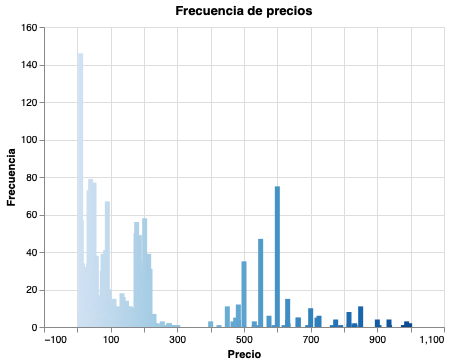

In [33]:
# price, general plot
alt.Chart(source).mark_bar().encode(
    alt.X('Price', title="Precio"),
    alt.Y('Frequency', title="Frecuencia"),
    alt.Color('Price', legend=None),
    tooltip=['Price', 'Frequency']
).properties(title="Frecuencia de precios")

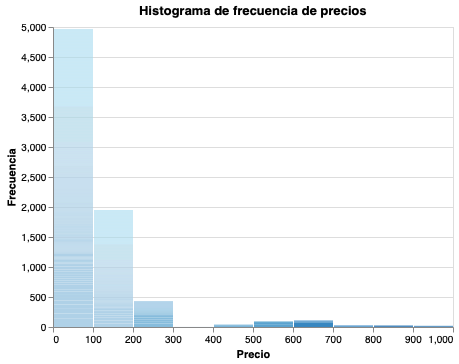

In [34]:
# price, histogram
alt.Chart(source).mark_bar().encode(
    alt.X('Price', bin=True, title="Precio"),
    alt.Y('Frequency', title="Frecuencia"),
    alt.Color('Price', bin=True, legend=None),
    tooltip=['Price', 'Frequency']
).properties(title="Histograma de frecuencia de precios")

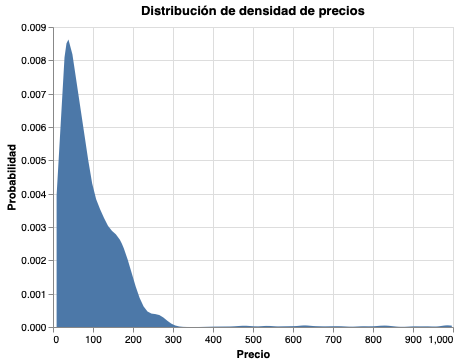

In [35]:
# price, density function
alt.Chart(source).transform_density(
    'Price',
    as_=['Price', 'density'],
).mark_area().encode(
    alt.X("Price:Q", title="Precio"),
    alt.Y('density:Q', title="Probabilidad"),
    tooltip=['Price']
).properties(title="Distribución de densidad de precios")

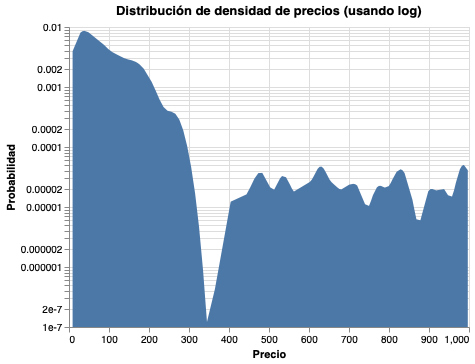

In [36]:
# price, log scale density function
alt.Chart(source).transform_density(
    'Price',
    as_=['Price', 'density'],
).mark_area().encode(
    alt.X("Price:Q", title="Precio"),
    y=alt.Y('density:Q', scale=alt.Scale(type="log"), title="Probabilidad"),
    tooltip=['Price']
).properties(title="Distribución de densidad de precios (usando log)")

### Producto

In [37]:
source = pd.DataFrame(df.producto.value_counts()).reset_index().rename(columns={"index":"Producto", "producto":"Frequency"})
source

,Producto,Frequency
0,Wheat flour,950
1,"Rice (basmati, broken)",950
2,Rice (coarse),830
3,Wheat,727
4,Poultry,392
5,Oil (cooking),392
6,Sugar,392
7,Ghee (artificial),390
8,Fuel (diesel),350
9,Beans(mash),325


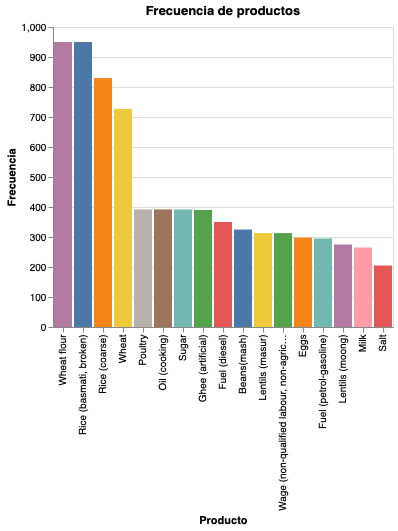

In [38]:
# price, general plot
alt.Chart(source).mark_bar().encode(
    alt.X('Producto',  sort='-y'),
    alt.Y('Frequency', title="Frecuencia"),
    alt.Color('Producto', legend=None),
    tooltip=['Producto', 'Frequency']
).properties(title="Frecuencia de productos")

### Category

In [39]:
source = pd.DataFrame(df.category.value_counts()).reset_index().rename(columns={"index":"Category", "category":"Frequency"})
source

,Category,Frequency
0,cereals and tubers,3457
1,non-food,958
2,pulses and nuts,913
3,oil and fats,782
4,"meat, fish and eggs",690
5,miscellaneous food,597
6,milk and dairy,265


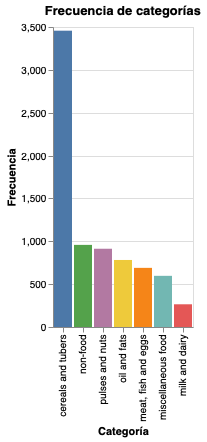

In [40]:
# price, general plot
alt.Chart(source).mark_bar().encode(
    alt.X('Category',  sort='-y', title="Categoría"),
    alt.Y('Frequency', title="Frecuencia"),
    alt.Color('Category', legend=None),
    tooltip=['Category', 'Frequency']
).properties(title="Frecuencia de categorías")

### Precio promedio por producto a lo largo del tiempo
#### _Price, Date & Producto_

In [41]:
source = pd.pivot_table(df, index=["date", "producto"], values=["price"], aggfunc=np.mean, fill_value=0).reset_index()
source

,date,producto,price
0,2004-01-15,"Rice (basmati, broken)",18.8710
1,2004-01-15,Wheat flour,12.5510
2,2004-02-15,"Rice (basmati, broken)",18.7540
3,2004-02-15,Wheat flour,12.8040
4,2004-03-15,"Rice (basmati, broken)",18.8180
...,...,...,...
1560,2019-10-15,Rice (coarse),63.1720
1561,2019-10-15,Sugar,74.1280
1562,2019-10-15,"Wage (non-qualified labour, non-agricultural)",815.0000
1563,2019-10-15,Wheat,38.2760


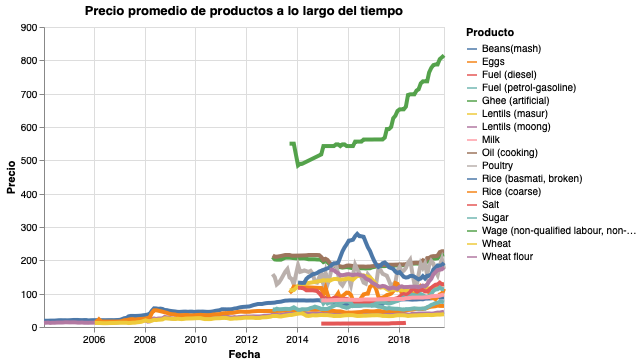

In [42]:
# Gráfica integrada
plot = alt.Chart(source).mark_line(size = 4).encode(
    alt.X('date:T', title="Fecha"),
    alt.Y('price:Q', title="Precio"),
    alt.Color('producto:N', title="Producto")).properties(title="Precio promedio de productos a lo largo del tiempo",
                width=400, height=300
    )
plot

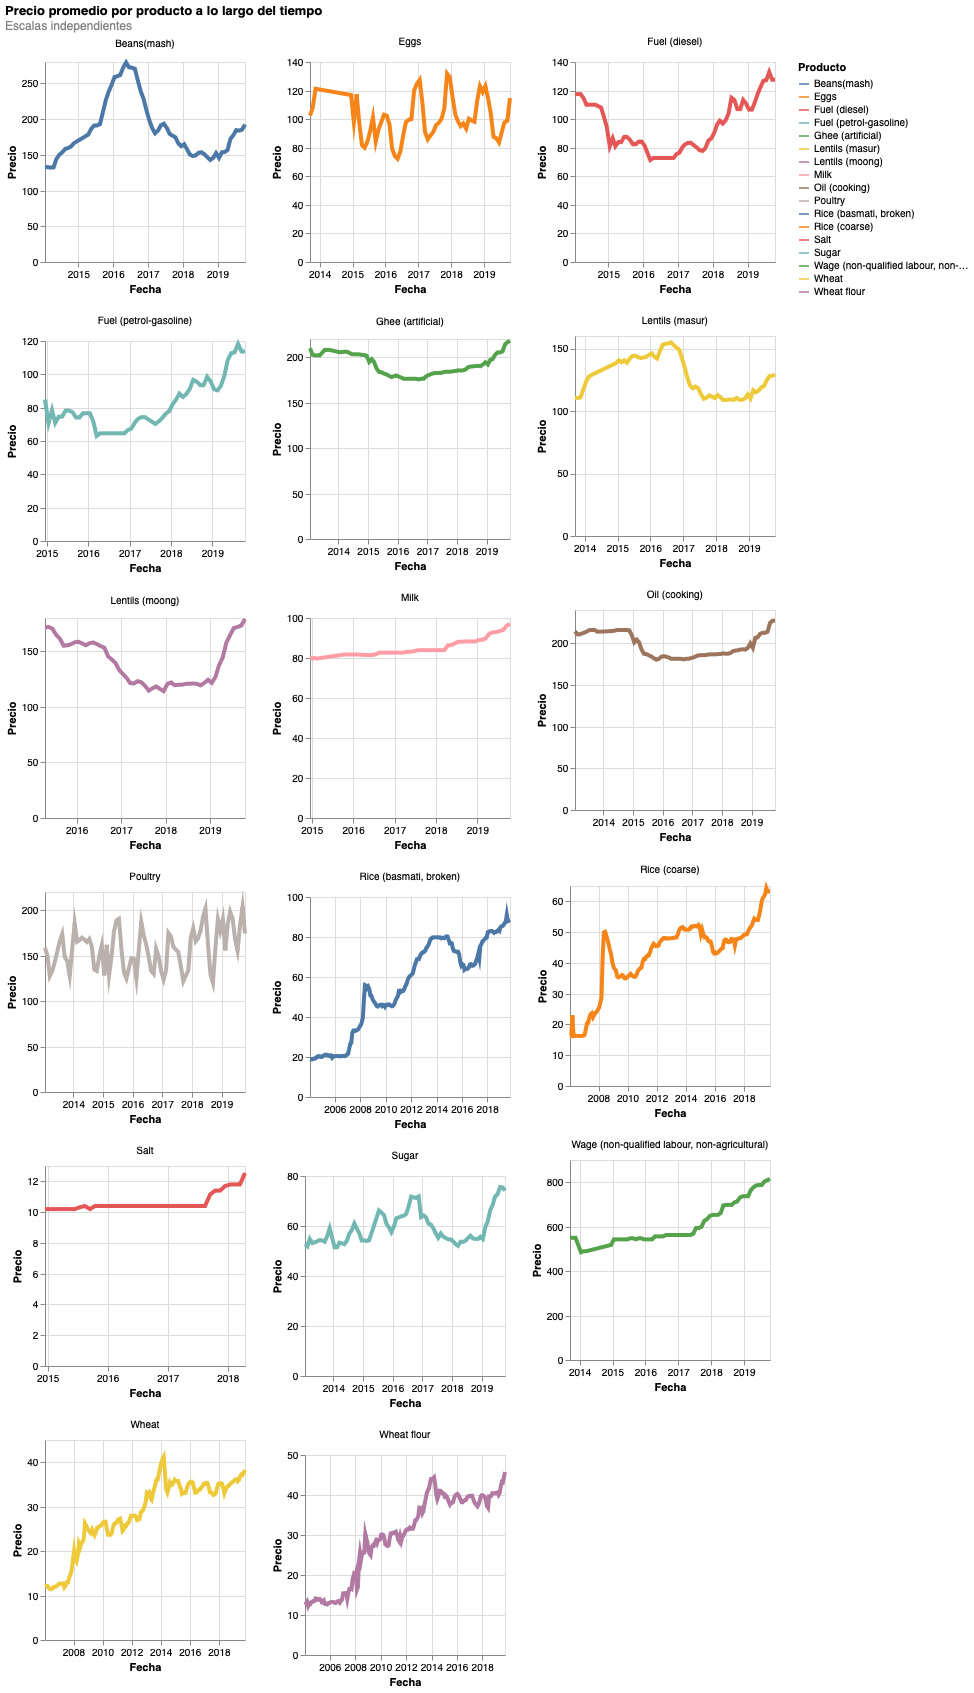

In [43]:
# Gráfica por producto
plot.properties(width=200, height=200).facet(alt.Facet('producto:N', title=None),
            columns=3
    ).resolve_axis(
        x='independent',
        y='independent'
    ).resolve_scale(
        x='independent', 
        y='independent'
).properties(title={
      "text": ["Precio promedio por producto a lo largo del tiempo"], 
      "subtitle": ["Escalas independientes"],
      "color": "black",
      "subtitleColor": "grey"}
    )

### Precio promedio por categoría de los productos a lo largo del tiempo
#### _Price, Date & Category_

In [44]:
source = pd.pivot_table(df, index=["date", "category"], values=["price"],
                        aggfunc=np.mean, fill_value=0).reset_index()
source

,date,category,price
0,2004-01-15,cereals and tubers,15.711000
1,2004-02-15,cereals and tubers,15.779000
2,2004-03-15,cereals and tubers,16.054000
3,2004-04-15,cereals and tubers,15.709500
4,2004-05-15,cereals and tubers,16.023500
...,...,...,...
624,2019-10-15,milk and dairy,97.038000
625,2019-10-15,miscellaneous food,74.128000
626,2019-10-15,non-food,352.091333
627,2019-10-15,oil and fats,222.572000


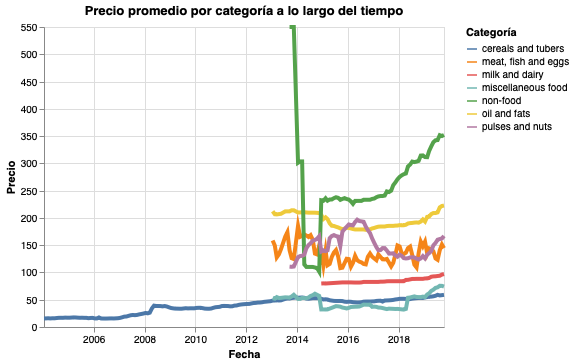

In [45]:
# Gráfica integrada
plot = alt.Chart(source).mark_line(size = 4).encode(
    alt.X('date:T', title="Fecha"),
    alt.Y('price:Q', title="Precio"),
    alt.Color('category:N', title="Categoría")).properties(title="Precio promedio por categoría a lo largo del tiempo",
                width=400, height=300
    )
plot

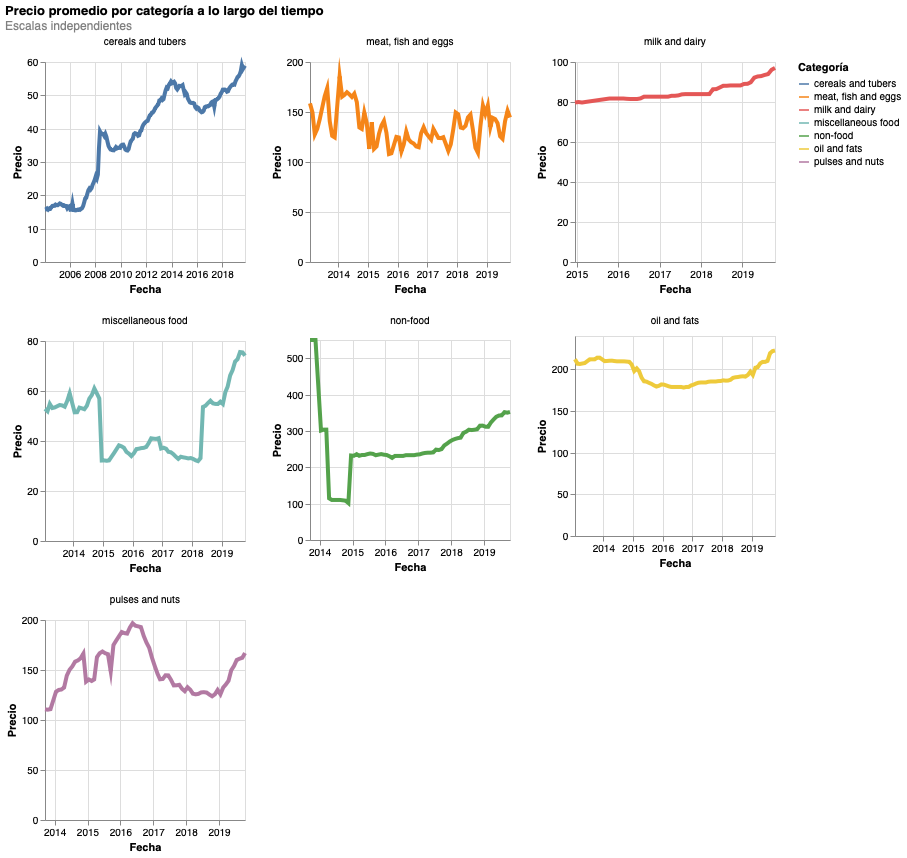

In [46]:
# Gráfica por producto
plot.properties(width=200, height=200).facet(alt.Facet('category:N', title=None),
            columns=3
    ).resolve_axis(
        x='independent',
        y='independent'
    ).resolve_scale(
        x='independent', 
        y='independent'
).properties(title={
      "text": ["Precio promedio por categoría a lo largo del tiempo"], 
      "subtitle": ["Escalas independientes"],
      "color": "black",
      "subtitleColor": "grey"}         
)

### Precios de la categoría _'meat, fish & eggs'_ por mes y año

In [47]:
source = df[df.category=="meat, fish and eggs"].reset_index()

# para la gráfica cree dos variables nuevas: mes y año
source['year'] = pd.DatetimeIndex(source['date']).year
source['month'] = pd.DatetimeIndex(source['date']).month
print("\nLa categoría 'meat, fish and eggs' tiene un total de", len(source), "registros.\n")
source.head()


La categoría 'meat, fish and eggs' tiene un total de 690 registros.



,index,date,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,umid,catid,sn,producto,year,month
0,612,2013-09-15,Dozen,"meat, fish and eggs",102.50,PKR,Pakistan,Balochistan,2272,Quetta,295.0,92,35.0,2,295_92_15_35,Eggs,2013,9
1,613,2013-10-15,Dozen,"meat, fish and eggs",108.00,PKR,Pakistan,Balochistan,2272,Quetta,295.0,92,35.0,2,295_92_15_35,Eggs,2013,10
2,614,2013-11-15,Dozen,"meat, fish and eggs",121.25,PKR,Pakistan,Balochistan,2272,Quetta,295.0,92,35.0,2,295_92_15_35,Eggs,2013,11
3,615,2014-12-15,Dozen,"meat, fish and eggs",125.00,PKR,Pakistan,Balochistan,2272,Quetta,295.0,92,35.0,2,295_92_15_35,Eggs,2014,12
4,616,2015-01-15,Dozen,"meat, fish and eggs",118.75,PKR,Pakistan,Balochistan,2272,Quetta,295.0,92,35.0,2,295_92_15_35,Eggs,2015,1


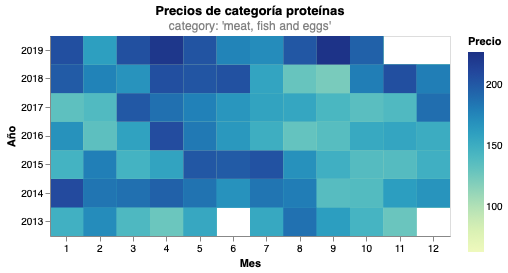

In [48]:
alt.Chart(source).mark_rect().encode(
    alt.X("month:O", title = "Mes", axis = alt.Axis(labelAngle = 0)),
    alt.Y('year:O', title = "Año", sort="-y"),
    alt.Color('price:Q', title = "Precio"),
    tooltip=['year', 'month', 'price']
).properties(title={
    "text": ["Precios de categoría proteínas"], 
    "subtitle": ["category: 'meat, fish and eggs'"],
    "color": "black",
    "subtitleColor": "grey"},
             width=400, height=200)

### Precios de productos por categoría y año

In [49]:
source = df.reset_index()
source['year'] = pd.DatetimeIndex(source['date']).year
source = pd.pivot_table(source, index=["producto", "category", "year"], values=["price"],
                        aggfunc=np.mean, fill_value=0).reset_index()
source

,producto,category,year,price
0,Beans(mash),pulses and nuts,2014,147.701455
1,Beans(mash),pulses and nuts,2015,206.681250
2,Beans(mash),pulses and nuts,2016,256.829500
3,Beans(mash),pulses and nuts,2017,181.706667
4,Beans(mash),pulses and nuts,2018,151.292667
...,...,...,...,...
138,Wheat flour,cereals and tubers,2015,38.966767
139,Wheat flour,cereals and tubers,2016,39.137550
140,Wheat flour,cereals and tubers,2017,38.733233
141,Wheat flour,cereals and tubers,2018,39.325400


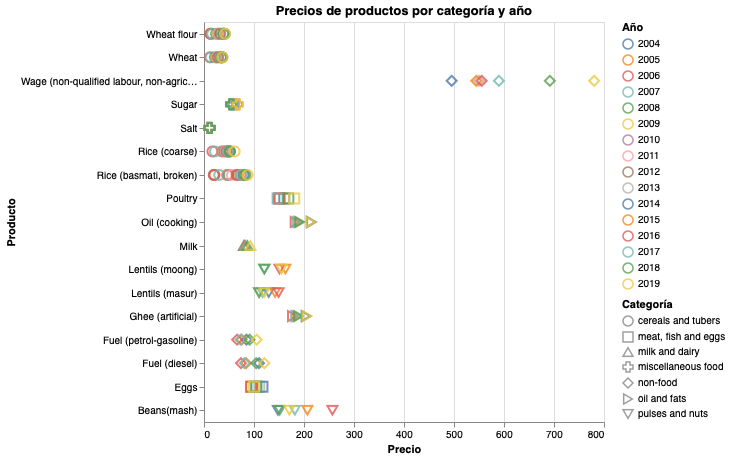

In [50]:
alt.Chart(source).mark_point(opacity=0.8, size=100).encode(
    alt.X("price", title = "Precio", axis = alt.Axis(labelAngle = 0)),
    alt.Y('producto', title = "Producto", sort="-y"),
    alt.Shape('category:N', title="Categoría"),
    alt.Color('year:N', title="Año"),
    tooltip=['producto', 'category', 'year', 'price']
).properties(title="Precios de productos por categoría y año", width=400, height=400)

## 6. Comentarios adicionales

- EDA un proceso iterativo:
    - esto debido a que mientras vamos realizando el análisis nos damos cuenta de diversas situaciones o acciones que pueden mejorar nuestra base de datos, como limpiar alguna variable, transformar una variable ya sea en variables numéricas, categóricas o agrupándolas, y mientras más entendamos la base de datos será más fácil trabajar con ellas y realizar mejoras.
    
    - Tener cuidado ⚠️ porque, el EDA al ser un proceso iterativo, podemos "envolvernos" en este proceso y utilizar más tiempo del necesario en esta etapa, lo cual podría tener un impacto en el tiempo de entrega del proyecto.
    
- Además, dependiendo del objetivo del proyecto, se pueden integrar varias bases de datos que se complementen. Por ejemplo, en la base de datos que trabajamos con información de precios de productos básicos de Pakistán, se podría integrar:

    - información *macroeconómica* para ver si estos precios tienen efecto en la economía del país (duuuh, claro!),
    - información *meteorológica* para comparar si los precios se vieron afectados por lluvia, sequía, terremotos, ...
    - bases de datos *de inseguridad y de desempleo* para identificar si tuvo efectos sociales, 
    - bases de datos *demográficas* para identificar los movimientos en precios afectaron las tasas de nacimientos o mortalidad, etc.

## 7. Referencias
- J. VanderPlas. (2016). [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/). O'Reilly Media.

- UBC MDS. (2019). Material público de los cursos [Programación en Python para Data Science](https://github.com/UBC-MDS/DSCI_531_viz-1) y [Visualización de datos I](https://github.com/UBC-MDS/DSCI_531_viz-1) del _Master in Data Science_ de UBC.

- K. Katari. (Aug 21, 2020).[Exploratory Data Analysis(EDA): Python](https://towardsdatascience.com/exploratory-data-analysis-eda-python-87178e35b14). Towards Data Science. 

- J.M. Reid. (Oct 14, 2021). [13 ways to access data in Python](https://towardsdatascience.com/13-ways-to-access-data-in-python-bac5683e0063). Towards Data Science. 

- A.K. Garg, V. Cuspinera-Contreras, Y. Qian. (Oct 2020). [Bike Sharing Machine Learning Model, EDA section](https://github.com/vcuspinera/MDS_Bike_Sharing/blob/master/eda/EDA.ipynb).

- Pure Storage, Inc. (2022). [Datos estructurados frente a datos no estructurados](https://www.purestorage.com/la/knowledge/big-data/structured-vs-unstructured-data.html).

